In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization


In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\TASK-ML-INTERN.csv")

# Display the first 5 rows
print(df.head())

# Check dataset shape
print("\nDataset shape:", df.shape)


           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443       444       445 

In [4]:
(df.isnull().sum()).sum()

np.int64(0)

In [5]:
print("Dataset Summary:")
print(df.describe())


Dataset Summary:
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.043773  

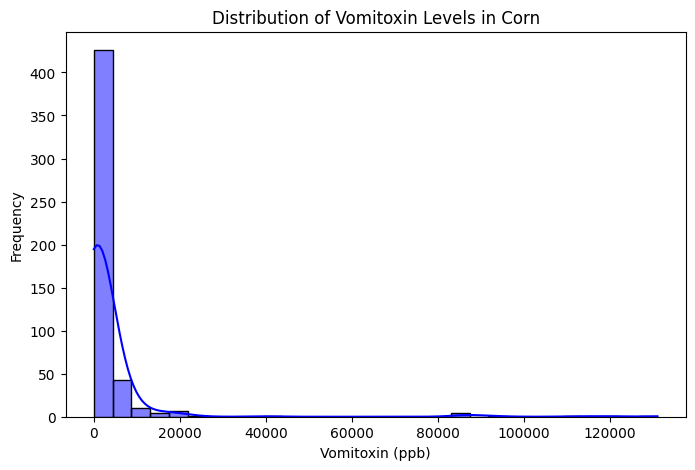

In [6]:
# Histogram of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df["vomitoxin_ppb"], bins=30, kde=True, color="blue")
plt.xlabel("Vomitoxin (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of Vomitoxin Levels in Corn")
plt.show()


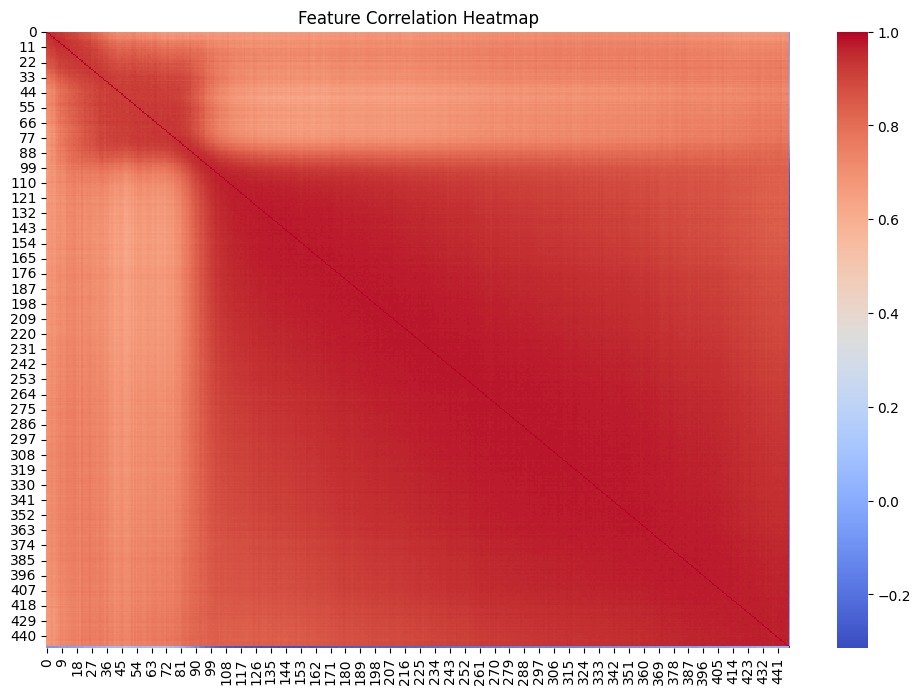

In [7]:
# Compute correlation matrix
corr_matrix = df.drop(columns=["hsi_id"]).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
X = df.drop(columns=["hsi_id", "vomitoxin_ppb"])  # Remove non-numeric columns
y = df["vomitoxin_ppb"]


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


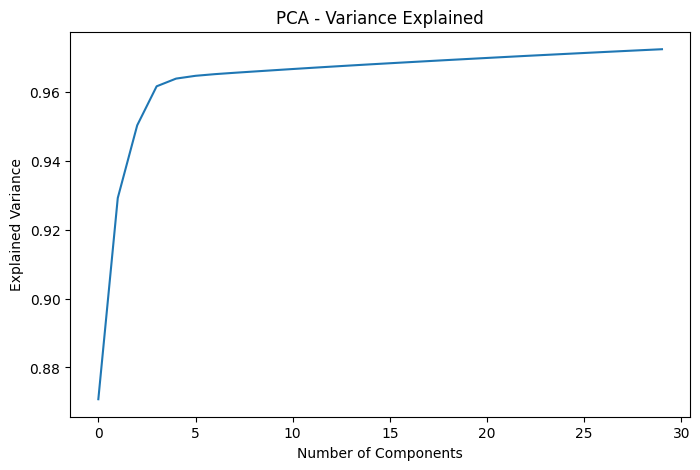

In [10]:
pca = PCA(n_components=30)  # Keeping top 30 principal components
X_pca = pca.fit_transform(X_scaled)

# Check variance explained
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("PCA - Variance Explained")
plt.show()


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Reshape for CNN input
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("CNN Input Shape:", X_train_cnn.shape)


CNN Input Shape: (400, 30, 1)


In [19]:
cnn_model = Sequential([
    Conv1D(filters=128, kernel_size=9, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    BatchNormalization(),
    
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Slightly increase learning rate for stability
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

cnn_model.summary()


d:\python-coding-challenge\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 22, 128)        │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 22, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 18, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 18, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 16, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,233 (481.38 KB)

 Trainable params: 122,849 (479.88 KB)

 Non-trainable params: 384 (1.50 KB)

In [20]:
history = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=200, batch_size=8)


Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 296662848.0000 - val_loss: 298476832.0000
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 253816672.0000 - val_loss: 292452544.0000
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 232364720.0000 - val_loss: 283141152.0000
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 131721592.0000 - val_loss: 262529680.0000
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 98346768.0000 - val_loss: 230557888.0000
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 57345232.0000 - val_loss: 185847760.0000
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 122335288.0000 - val_loss: 203662528.0000
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 110284512.0000 - val_loss: 103750864.0000
Epoch 9/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27871910.0000 - val_loss: 112383864.0000
Epoch 10/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 44576040.0000 - val_loss: 137147

In [21]:
# Predictions
y_pred = cnn_model.predict(X_test_cnn)

# Compute RMSE & R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"CNN RMSE: {rmse:.2f}, R²: {r2:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
CNN RMSE: 7509.82, R²: 0.7982


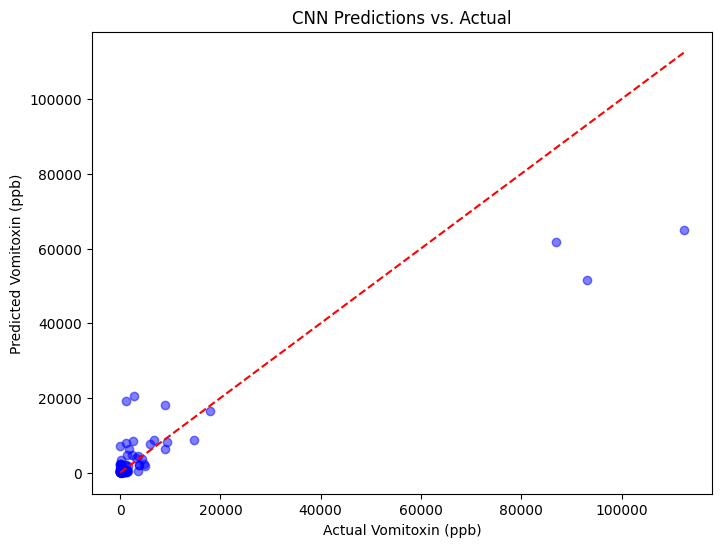

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("CNN Predictions vs. Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.show()


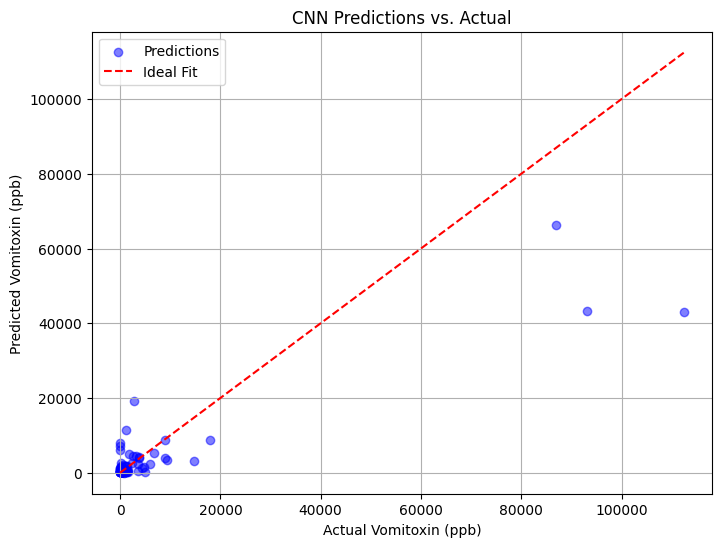

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")  # Diagonal line
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("CNN Predictions vs. Actual")
plt.legend()
plt.grid()
plt.show()


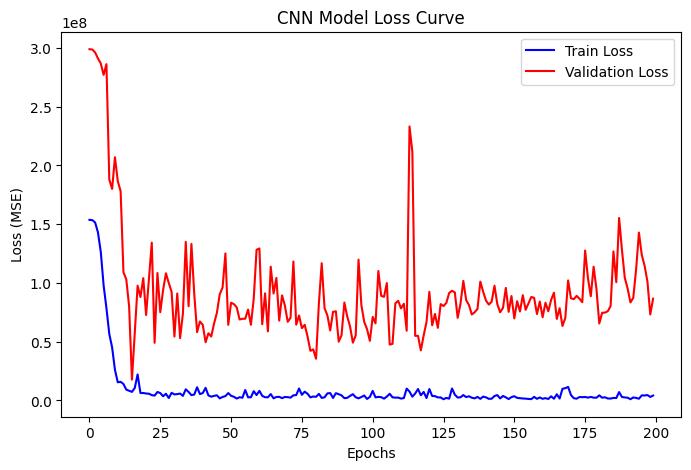

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="Train Loss", color="blue")
plt.plot(history.history['val_loss'], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("CNN Model Loss Curve")
plt.legend()
plt.show()
